***Step 1. Importing Modules***

In [145]:
#%matplotlib inline


import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from scipy import stats
import sklearn as sk
import itertools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
import xgboost as xgb
import lightgbm as lgb


from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split


sns.set(style='white', context='notebook', palette='dark')



 **Step 2. Loading Data**


In [146]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")
combine = pd.concat([train.drop('Survived',1),test])

**Step 3. EDA...part 1...describing the data...looking at the data description and null values****

In [147]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [148]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Checking for NAs

In [149]:
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [150]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [151]:
surv = train[train['Survived']==1]
nosurv = train[train['Survived']==0]
print("Survived: %i (%.1f percent), Not Survived: %i (%.1f percent), Total: %i"\
      %( len(surv),1.*len(surv)/len(train)*100.0, \
        len(nosurv), 1.*len(nosurv)/len(train)*100.0, len(train)))

Survived: 342 (38.4 percent), Not Survived: 549 (61.6 percent), Total: 891


Step 3 : EDA-Data Visualization

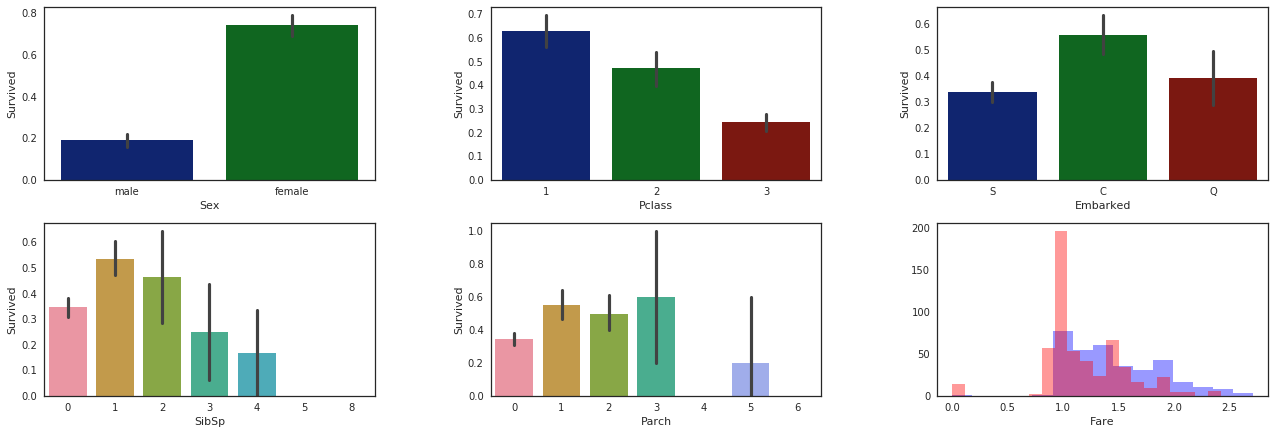

In [152]:
warnings.filterwarnings(action="ignore")
plt.figure(figsize=[20,10])
surv_col = "blue"
nosurv_col = "red"


plt.subplot(331)
sns.barplot('Sex', 'Survived', data=train)
plt.subplot(332)
sns.barplot('Pclass', 'Survived', data=train)
plt.subplot(333)
sns.barplot('Embarked', 'Survived', data=train)
plt.subplot(334)
sns.barplot('SibSp', 'Survived', data=train)
plt.subplot(335)
sns.barplot('Parch', 'Survived', data=train)
plt.subplot(336)
sns.distplot(np.log10(surv['Fare'].dropna().values+1), kde=False, color=surv_col)
sns.distplot(np.log10(nosurv['Fare'].dropna().values+1), kde=False, color=nosurv_col,axlabel='Fare')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)


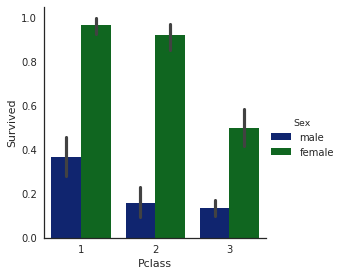

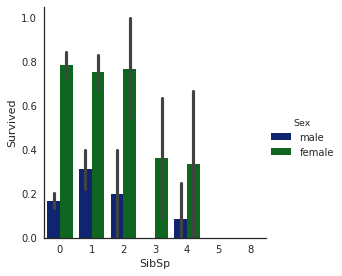

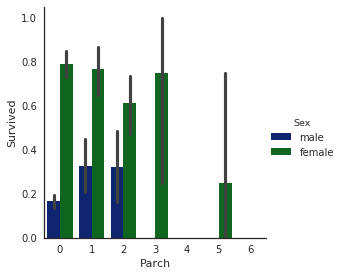

In [153]:


sns.factorplot('Pclass','Survived',hue='Sex',data=train, kind='bar')
plt.show()

sns.factorplot('SibSp','Survived',hue='Sex',data=train, kind='bar' )
plt.show()

sns.factorplot('Parch','Survived',hue='Sex',data=train, kind='bar' )
plt.show()




In [154]:
tab = pd.crosstab(train['SibSp'], train['Survived'])
print(tab)

Survived    0    1
SibSp             
0         398  210
1          97  112
2          15   13
3          12    4
4          15    3
5           5    0
8           7    0


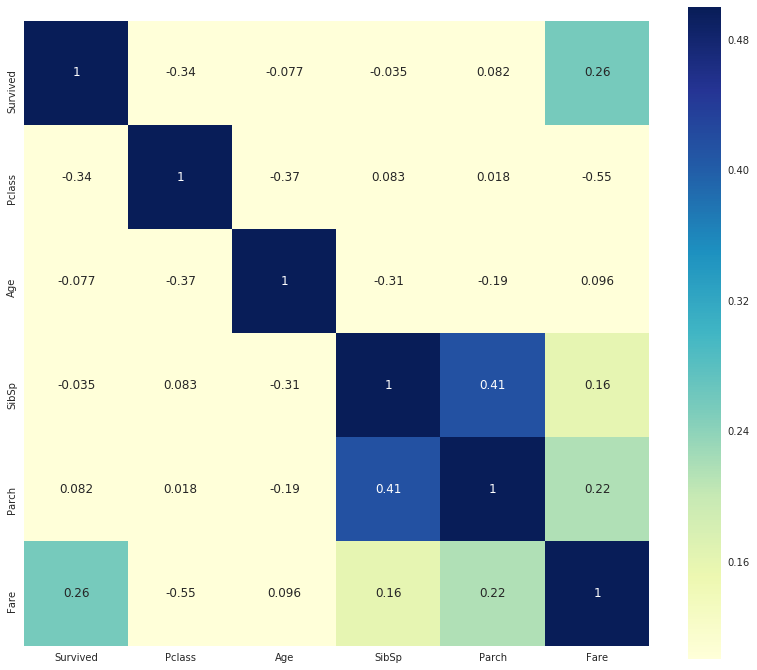

In [155]:
plt.figure(figsize=(14,12))
fig = sns.heatmap(train.drop('PassengerId',axis=1).corr(), vmin = 0.1, vmax=0.5, cmap="YlGnBu", square=True, annot=True)


Heatmap for men and women


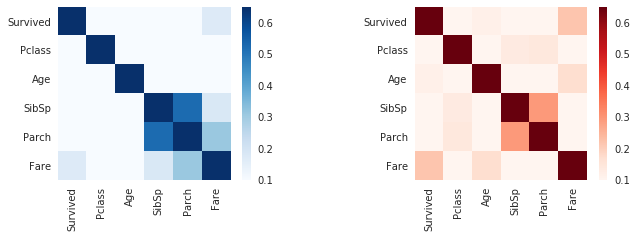

In [156]:
warnings.filterwarnings(action="ignore")
plt.figure(figsize=[20,10])
plt.subplot(331)
sns.heatmap(train[train['Sex']=='male'].drop('PassengerId',axis=1).corr(), vmin = 0.1, vmax=0.65, cmap="Blues", square=True)

plt.subplot(332)
sns.heatmap(train[train['Sex']=='female'].drop('PassengerId',axis=1).corr(), vmin = 0.1, vmax=0.65, cmap="Reds", square=True)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.30, right=0.95, hspace=0.25,
                    wspace=0.60)




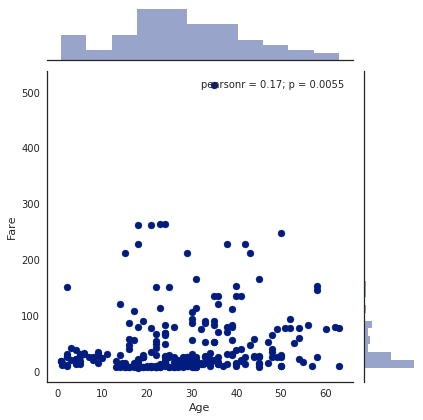

In [157]:
joint = sns.jointplot(x="Age", y="Fare", data = train[train['Sex']=='female']);



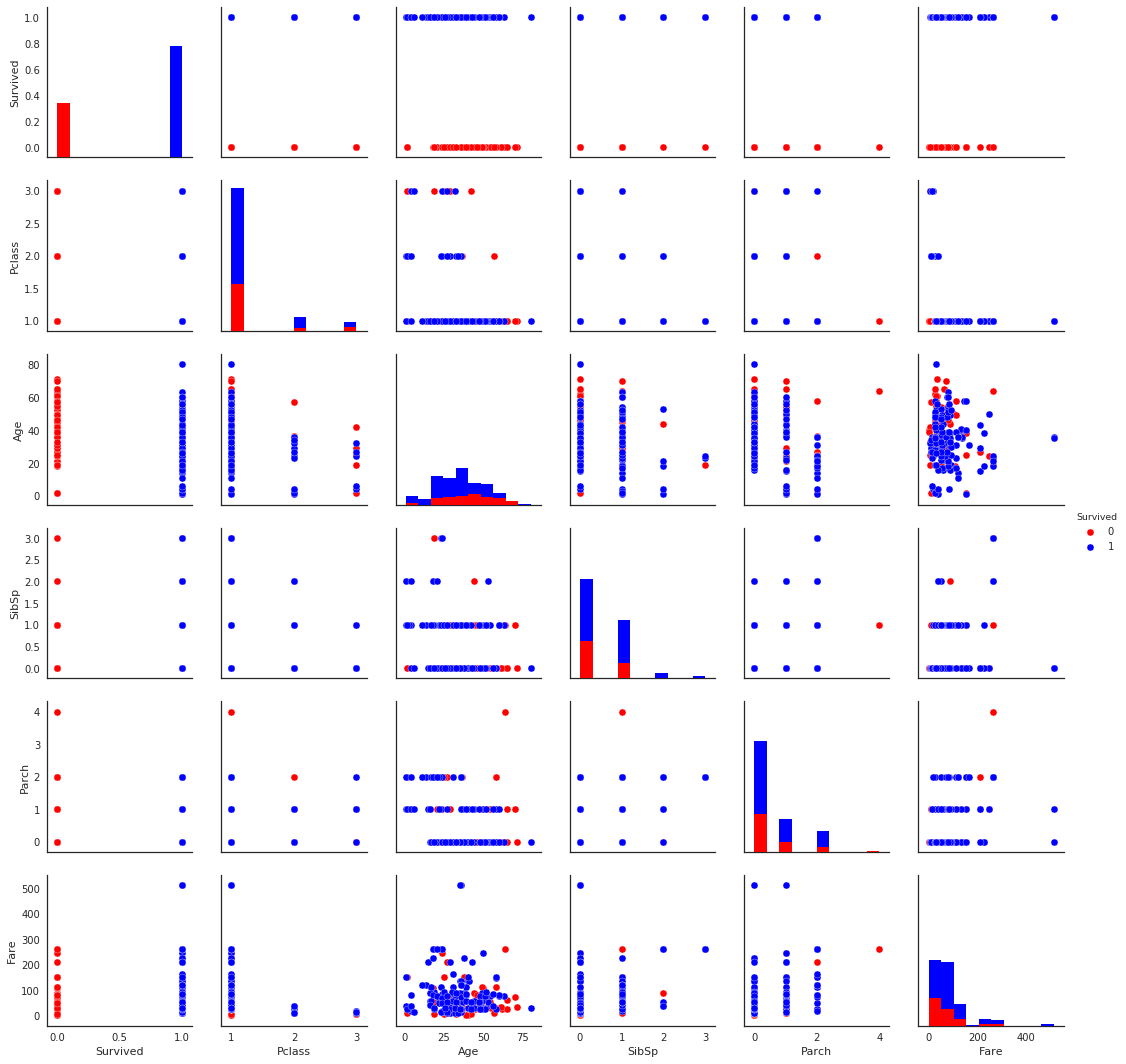

In [158]:
sns.pairplot(train.drop('PassengerId',axis=1).dropna(), hue='Survived', palette=[nosurv_col,surv_col])

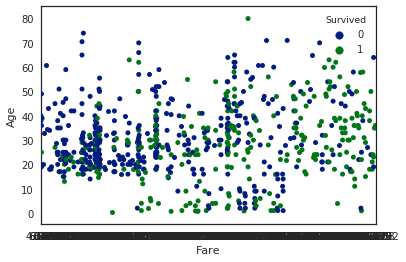

In [159]:
sns.swarmplot(x="Fare", y="Age", hue="Survived", data=train)

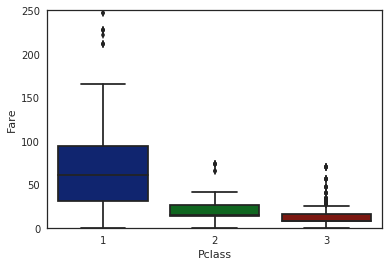

In [160]:
box = sns.boxplot(x="Pclass", y="Fare", data=train)
axes = box.axes
axes.set_ylim(0,250);



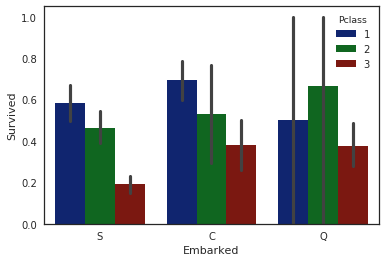

In [161]:
sns.barplot(x="Embarked", y="Survived", hue="Pclass", data=train)


Step 4: Missing Values

In [162]:
print(test[test['Fare'].isnull()])


     PassengerId  Pclass                Name   Sex   Age  SibSp  Parch Ticket  \
152         1044       3  Storey, Mr. Thomas  male  60.5      0      0   3701   

     Fare Cabin Embarked  
152   NaN   NaN        S  


In [163]:
print(train[train['Embarked'].isnull()])

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN  


Filling in Embarked and Fare

In [164]:
train['Embarked'].iloc[61] = "C"
train['Embarked'].iloc[829] = "C"
test['Fare'].iloc[152] = combine['Fare'][combine['Pclass'] == 3].dropna().median()


Filling in Age

In [165]:

combine = pd.concat([train.drop('Survived',1),test])
survived = train['Survived']
combine['Title'] = combine['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
combine['Age_imputation'] = combine.groupby(['Title','Pclass'])['Age'].apply(lambda x: x.fillna(x.mean()))

ValueError: cannot reindex from a duplicate axis

Step 5: Feature Engineering

In [170]:
combine['Age'] = combine['Age'].fillna(combine['Age'].mean())
cut_points = [0,1,12,18,35,60,120]
labels = ["infant","child","teenager","young_adult","adult","senior"]
combine["Age_bins"] = pd.cut(train["Age"], cut_points, labels= labels)
combine['Fare_bins'] = pd.qcut(combine['Fare'], 4, labels = [1, 2, 3, 4])
combine['Cabin_bins'] = combine['Cabin'].isnull() == False
combine.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_bins,Fare_bins,Cabin_bins
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,Mr,young_adult,1,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,Mrs,adult,4,True
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,Miss,young_adult,2,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,Mrs,young_adult,4,True
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,Mr,young_adult,2,False


Step 7: Categorical Variables

In [171]:



combine["Sex"] = combine["Sex"].astype("category")
combine["Sex"].cat.categories = [0,1]
combine["Sex"] = combine["Sex"].astype("int")
combine["Embarked"] = combine["Embarked"].astype("category")
combine["Embarked"].cat.categories = [0,1,2]
combine["Embarked"] = combine["Embarked"].astype("int")


combine["Age_bins"] = combine["Age_bins"].astype("category")
combine["Age_bins"].cat.categories = [0,1,2,3,4,5]
combine["Age_bins"] = combine["Age_bins"].astype("int")

combine["Cabin_bins"] = combine["Cabin_bins"].astype("category")
combine["Cabin_bins"].cat.categories = [0,1]
combine["Cabin_bins"] = combine["Cabin_bins"].astype("int")

combine.head(5)



,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_bins,Fare_bins,Cabin_bins
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,Mr,3,1,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,Mrs,4,4,1
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,Miss,3,2,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,Mrs,3,4,1
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,Mr,3,2,0


Step 8 : Splitting into test and train

In [172]:
test = combine.iloc[len(train):]
train = combine.iloc[:len(train)]
train['Survived'] = survived

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]

predictors.head(5)
predictors = predictors.drop(['Ticket','Name', 'Fare', 'Title','Cabin'], axis=1)
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

predictors.head(20)

,Pclass,Sex,Age,SibSp,Parch,Embarked,Age_bins,Fare_bins,Cabin_bins
0,3,1,22.000000,1,0,2,3,1,0
1,1,0,38.000000,1,0,0,4,4,1
2,3,0,26.000000,0,0,2,3,2,0
3,1,0,35.000000,1,0,2,3,4,1
4,3,1,35.000000,0,0,2,3,2,0
5,3,1,29.881138,0,0,1,3,2,0
6,1,1,54.000000,0,0,2,4,4,1
7,3,1,2.000000,3,1,2,1,3,0
8,3,0,27.000000,0,2,2,3,2,0
9,2,0,14.000000,1,0,0,2,3,0


Step 10: Use Machine Learning Classifiers

In [173]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)


randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)


Step 12: Cross Validation

In [174]:
crossval_gaussian = cross_val_score(gaussian, x_train, y_train, cv=5).mean()
crossval_random = cross_val_score(randomforest, x_train, y_train, cv=5).mean()
crossval_logreg = cross_val_score(logreg, x_train, y_train, cv=5).mean()



Step 13: Comparing Models

In [175]:
Output = pd.DataFrame({
    'Model': ['Naive Bayes', 'Logistic Regression', 'Random Forest'],
    'Accuracy': [acc_gaussian, acc_logreg, acc_randomforest],
    'Cross_val': [crossval_gaussian, crossval_logreg, crossval_random]
})
Output.sort_values(by='Cross_val', ascending=False)

,Accuracy,Cross_val,Model
1,82.23,0.799781,Logistic Regression
2,82.74,0.782442,Random Forest
0,79.70,0.766604,Naive Bayes


Step 15: Predicting 

In [179]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Age_bins,Fare_bins,Cabin_bins
0,892,3,1,34.5,0,0,1,3,1,0
1,893,3,0,47.0,1,0,2,4,1,0
2,894,2,1,62.0,0,0,1,3,2,0
3,895,3,1,27.0,0,0,2,3,2,0
4,896,3,0,22.0,1,1,2,3,2,0


In [185]:
ids = test['PassengerId']
predictions = randomforest.predict(test.drop('PassengerId', axis=1))
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)

This notebook borrows from the following :- 
1. https://www.kaggle.com/headsortails/pytanic
2. https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python
3. https://www.kaggle.com/ash316/eda-to-prediction-dietanic
4. https://www.kaggle.com/nadintamer/titanic-survival-predictions-beginner